# OOP Part 3: Abstraction and Polymorphism

### Class Relationships

- Aggregation
- Inheritance

## Aggregation (Has-A Relationship)

**Aggregation** is an object-oriented design principle that represents a "has-a" relationship between objects. It allows a complex object (or entity) to be composed of one or more smaller, reusable objects. Instead of inheriting all properties and behaviors from a parent class, aggregation enables an object to include instances of other classes as its attributes. This is particularly useful when modeling real-world entities that naturally consist of several distinct components.

### Aggregation in Forming Complex Attributes

Consider an attribute like **address** in a customer management system. An address is a complex entity—it often comprises multiple parts such as street, city, state, and zip code. Rather than representing all these components as separate attributes in the `Customer` class, you can encapsulate them within a dedicated `Address` class. This design leads to clearer, more maintainable code because the `Address` class is solely responsible for handling its own details.

#### Example: The `Address` Class

```python
class Address:
    def __init__(self, street, city, state, zip_code):
        # Private variables (by convention, prefixed with an underscore)
        self._street = street
        self._city = city
        self._state = state
        self._zip_code = zip_code

    # Getter methods to access private variables
    def get_street(self):
        return self._street

    def get_city(self):
        return self._city

    def get_state(self):
        return self._state

    def get_zip_code(self):
        return self._zip_code

    def __str__(self):
        return f"{self._street}, {self._city}, {self._state} {self._zip_code}"
```

In this `Address` class:

- The address details are stored in private variables (indicated by the underscore `_` prefix). These variables cannot be directly accessed by other classes.
- Getter methods (`get_street()`, `get_city()`, etc.) are provided to safely access these private variables. This maintains encapsulation and protects the integrity of the data.

#### Using the `Address` Class in the `Customer` Class

The `Customer` class uses aggregation to include an address as one of its attributes. Instead of storing multiple address components individually, it stores an instance of the `Address` class. Here's how that works:

```python
class Customer:
    def __init__(self, name, address):
        self.name = name
        # Aggregation: An Address object is passed as a parameter and stored as a member variable
        self.address = address

    def display_info(self):
        # Accessing the complex address attribute via the Address object's getter methods
        print(f"Customer: {self.name}")
        print(f"Address: {self.address}")
```

Key points in this usage:

1. **Aggregation Relationship:**  
   The `Customer` class has an "address" attribute that is an object of the `Address` class. This demonstrates aggregation because a customer "has an" address.

2. **Encapsulation and Access Control:**  
   The `Address` class encapsulates its data by keeping its variables private. The `Customer` class cannot directly access the private variables (e.g., `_street`, `_city`) of the `Address` object. Instead, if it needs to use any specific address detail, it must do so through the provided getter methods.

   For example, if the `Customer` class wanted to access the street address directly, it would call:
   ```python
   street = self.address.get_street()
   ```

3. **Object as an Input:**  
   When creating a `Customer` object, an instance of the `Address` class is passed as an argument. This is a clear example of how one class's object is used as an input to another class, reinforcing modularity and reusability.

#### Putting It All Together

Here’s an example of how these classes might be used:

```python
# Create an Address object
customer_address = Address("123 Main St", "Springfield", "IL", "62704")

# Create a Customer object with the Address object as an attribute
customer = Customer("John Doe", customer_address)

# Display customer information
customer.display_info()
```

**Summary:**

- **Aggregation** allows the composition of complex entities by including objects of one class (e.g., `Address`) as attributes of another class (e.g., `Customer`).
- The `Address` class encapsulates all the details of an address and provides getter methods to access its private variables.
- The `Customer` class aggregates the `Address` object, thus modeling a "has-a" relationship, and uses the getter methods of `Address` to work with the address details without directly accessing its private data.
- This design not only keeps the code modular and organized but also reinforces encapsulation by ensuring that private data is only accessed in controlled ways.

This approach enhances code clarity and maintainability while accurately modeling real-world relationships between entities.

In [ ]:
# example
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address._Address__city,self.address.pin,self.address.state)

  def edit_profile(self,new_name,new_city,new_pin,new_state):
    self.name = new_name
    self.address.edit_address(new_city,new_pin,new_state)

class Address:

  def __init__(self,city,pin,state):
      self.__city = city
      self.pin = pin
      self.state = state

  def get_city(self):
    return self.__city

  def edit_address(self,new_city,new_pin,new_state):
    self.__city = new_city
    self.pin = new_pin
    self.state = new_state

add1 = Address('gurgaon',122011,'haryana')
cust = Customer('nitish','male',add1)

cust.print_address()

cust.edit_profile('ankit','mumbai',111111,'maharastra')
cust.print_address()
# method example
# what about private attribute

gurgaon 122011 haryana
mumbai 111111 maharastra


### Class Diagram for Aggregation in the above case
<center>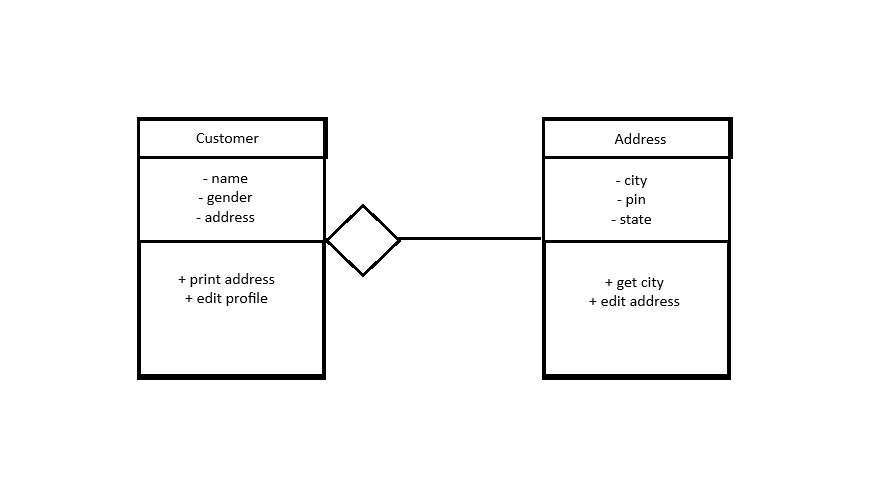</center>

## Inheritance
What is inheritance? Explain with example. Explain what are the things that get inherited. Mention that constructor, Non-private attributes and Non-private methods can be inherited. Explain why the Student class cannot access name from the parent User class. 

## Inheritance
### What is Inheritance in Python?

Inheritance is a feature in object-oriented programming (OOP) that allows a class (called a **child** or **subclass**) to inherit the attributes and methods from another class (called a **parent** or **superclass**). This helps to promote code reuse, as the child class automatically inherits the behavior of the parent class without needing to rewrite the code.

### Things That Get Inherited:
- **Constructor**: The child class can inherit the constructor of the parent class, but it can also define its own constructor if needed. If the child class doesn't have a constructor, the parent class's constructor will be used.
- **Non-private attributes**: Any non-private (i.e., public or protected) attributes of the parent class can be accessed in the child class.
- **Non-private methods**: Any non-private methods (public or protected) of the parent class can be accessed and used by the child class.

### Example of Inheritance:

```python
# parent
class User:
    def __init__(self):
        self.name = 'nitish'
        self.gender = 'male'

    def login(self):
        print('login')

# child
class Student(User):
    def __init__(self): # overrides the constructor of parent/super class
        self.rollno = 100

    def enroll(self):
        print('enroll into the course')

u = User()
s = Student()

print(s.name)   # This line will cause an issue
s.login()
s.enroll()
```
The above provided code will cause an error: `'Student' object has no attribute 'gender'`. This is explained below

### Explanation:

1. **Constructor in `Student` and `User`**:
   - The `Student` class inherits from the `User` class, but the `Student` class **does not explicitly call the `User` class's constructor** (`__init__`).
   - In Python, if the child class defines its own constructor, it **overrides** the constructor of the parent class. Therefore, in your case, the `Student` class does not automatically call the `User` class's constructor, and the `name` and `gender` attributes are not initialized for `s` (the object of type `Student`).
   
2. **The Solution**:
   - To fix this, you need to explicitly call the parent class's constructor using `super()`. This will ensure that the parent class's attributes (`name`, `gender`) are properly initialized.
   - Or we can simply avoid creating a constructor in the sub/child class, but that would not be so useful in real life programming scenarios.

### Corrected Code:

```python
# parent
class User:
    def __init__(self):
        self.name = 'nitish'
        self.gender = 'male'

    def login(self):
        print('login')

# child
class Student(User):
    def __init__(self):
        super().__init__()  # Calling the parent constructor to initialize 'name' and 'gender'
        self.rollno = 100

    def enroll(self):
        print('enroll into the course')

u = User()
s = Student()

print(s.name)    # Now this works
s.login()
s.enroll()
```

### Output:
```
nitish
login
enroll into the course
```

### Why This Fix Works:
- **`super().__init__()`**: This calls the constructor of the parent class (`User`), ensuring that the `name` and `gender` attributes are initialized properly in the `Student` object `s`. This allows the `name` attribute to be accessible when you print `s.name`.

### Summary:

- **Inheritance** allows the child class to inherit attributes and methods from the parent class.
- **Constructor**: If the child class does not explicitly call the parent class's constructor, it won't inherit the parent class's attributes.
- **Non-private attributes and methods** are inherited by the child class, but private ones (those with a leading double underscore, like `self.__name`) are not inherited directly.
- **`super()`** is used to explicitly call the parent class's constructor in the child class.

In your case, without `super().__init__()`, the `Student` class did not inherit the `name` and `gender` attributes from `User`, which is why `print(s.name)` gave an error.

`Note:` That a sub/child class inherits the constructor of the super/parent class by default, unless its not overridden by creating a constructor in the sub/child class

In [ ]:
# example of inhereting a super/parent class' constructor
# constructor example

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 13)
s.buy()

Inside phone constructor
Buying a phone


In [ ]:
# meanwhile another example, where super/parent class'
# constructor is overridden by the sub/child class' constructor
# constructor example 2

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, os, ram):
        self.os = os
        self.ram = ram
        print ("Inside SmartPhone constructor")

s=SmartPhone("Android", 2)
s.brand

Inside SmartPhone constructor


AttributeError: ignored

In [ ]:
# child can't access private members of the class

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    #getter
    def show(self):
        print (self.__price)

class SmartPhone(Phone):
    def check(self):
        print(self.__price)

s=SmartPhone(20000, "Apple", 13)
s.show() # able to call __price from a method within the parent class
# s.check() # trying to accomplish the same thing as above, but will fail
# because s.check() is trying to call a pvt variable of the parent class
# from the child class

Inside phone constructor
20000


In [ ]:
# accessing a pvt variable of parent class using a getter method
# of the same class, but object of the child class
# thus the child class inherits the getter method of the parent class as well
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def show(self):
        print("This is in child class")

son=Child(100)
print(son.get_num())
son.show()

100
This is in child class


In [ ]:
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def __init__(self,val,num):
        self.__val=val

    def get_val(self):
        return self.__val

son=Child(100,10)
print("Parent: Num:",son.get_num()) # this line will give an error because since
# child had a constructor, the constructor of the parent never ran and therefore the 
# variable num was never created in parent class
print("Child: Val:",son.get_val()) # though this line will work

AttributeError: ignored

In [ ]:
class A:
    def __init__(self):
        self.var1=100

    def display1(self,var1): #even though 200 was recieved by this var1,
        # the value for var1 was already set by constructor, and the 
        # current method does not assign any value to he incoming var
        # self.var1 = var1 this line will set var1 = 200
        print("class A :", self.var1)
class B(A):

    def display2(self,var1):
        print("class B :", self.var1)

obj=B()
obj.display1(200)

class A : 200


### Method Overriding
This is the term used when the child and the parent class have a method that goes by the **same name**. Method Overriding states that in such a case, the **constructor** of the parent class will be called, however the method in the parent class that has the same name will be overridden. 
*Check the below code for example*,

In [ ]:
# Method Overriding
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


### `super()` Keyword

The `super()` function in Python is used to call a method from the parent (super) class. It allows a child class to invoke methods or constructors from its parent class, enabling code reuse and extending the functionality of the parent class's methods.

The `super()` can only be used from inside a child/sub class. In case it is used from outside of the class, it will throw an error.

The `super()` keyword cannot be used to access attributes of a class or object, but can only be used to get methods. This is the reason why we have to call an attribute using the `super().__init__(price, brand, camera)` syntax for example.

### Summary
The `super()` keyword can be summarised in the following three lines:
- `super()` cannot access variables.
- `super()` cannot be used outside the class.
- `super()` is used inside the child class.

### Explanation for the code given below:
- **`super().buy()`**: In the `SmartPhone` class, the `super().buy()` line calls the `buy()` method from the parent `Phone` class. This allows the `SmartPhone` class to extend the functionality of the parent class's method by adding its own behavior and then calling the parent class's version of the method.
- **Constructor**: `super()` is also used in constructors to call the parent class's `__init__()` method, but here, it's specifically used in the `buy` method.

In [ ]:
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent ka buy method
        super().buy()

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone
Buying a phone


In [ ]:
# super -> constuctor
# anoter example
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, price, brand, camera, os, ram):
        print('Inside smartphone constructor')
        super().__init__(price, brand, camera)
        self.os = os
        self.ram = ram
        print ("Inside smartphone constructor")

s=SmartPhone(20000, "Samsung", 12, "Android", 2)

print(s.os)
print(s.brand)

Inside smartphone constructor
Inside phone constructor
Inside smartphone constructor
Android
Samsung


### Inheritance in summary

- A class can inherit from another class.

- Inheritance improves code reuse

- Constructor, attributes, methods get inherited to the child class

- The parent has no access to the child class

- Private properties of parent are not accessible directly in child class

- Child class can override the attributes or methods. This is called method overriding

- super() is an inbuilt function which is used to invoke the parent class methods and constructor

In [ ]:
# an example
class Parent:

    def __init__(self,num):
      self.__num=num

    def get_num(self):
      return self.__num

class Child(Parent):

    def __init__(self,num,val):
      super().__init__(num)
      self.__val=val

    def get_val(self):
      return self.__val

son=Child(100,200)
print(son.get_num())
print(son.get_val())

100
200


In [ ]:
# an example
class Parent:
    def __init__(self):
        self.num=100

class Child(Parent):

    def __init__(self):
        super().__init__()
        self.var=200

    def show(self):
        print(self.num)
        print(self.var)

son=Child()
son.show()

100
200


In [ ]:
# an example
class Parent:
    def __init__(self):
        self.num=100

class Child(Parent):

    def __init__(self):
        super().__init__()
        self.var=200

    def show(self):
        print(self.num)
        print(self.var)

son=Child()
son.show()

100
200


In [ ]:
# an example
class Parent:
    def __init__(self):
        self.__num=100

    def show(self):
        print("Parent:",self.__num)

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.__var=10

    def show(self):
        print("Child:",self.__var)

obj=Child()
obj.show()

Child: 10


## Types of Inheritance

- Single Inheritance
- Multilevel Inheritance
- Hierarchical Inheritance
- Multiple Inheritance(Diamond Problem)
- Hybrid Inheritance

### Types of Inheritance in Python

In Python, inheritance allows one class to inherit the attributes and methods of another class. There are several types of inheritance, each with different relationships between the classes. Here’s an explanation of each type along with examples:

---

### 1. **Single Inheritance**

**Definition**: In single inheritance, a subclass inherits from one superclass only.

- **Example**:
  ```python
  class Phone:
      def __init__(self, price, brand, camera):
          print("Inside phone constructor")
          self.__price = price
          self.brand = brand
          self.camera = camera
  
      def buy(self):
          print("Buying a phone")

  class SmartPhone(Phone):
      pass

  SmartPhone(1000, "Apple", "13px").buy()
  ```

- **Explanation**: The `SmartPhone` class inherits from the `Phone` class. The `SmartPhone` class does not add any new attributes or methods, but it inherits the `buy()` method from the `Phone` class.

---

### 2. **Multilevel Inheritance**

**Definition**: In multilevel inheritance, a class is derived from a class that is already derived from another class. Essentially, it forms a "chain" of inheritance.

- **Example**:
  ```python
  class Product:
      def review(self):
          print("Product customer review")

  class Phone(Product):
      def __init__(self, price, brand, camera):
          print("Inside phone constructor")
          self.__price = price
          self.brand = brand
          self.camera = camera

      def buy(self):
          print("Buying a phone")

  class SmartPhone(Phone):
      pass

  s = SmartPhone(20000, "Apple", 12)
  s.buy()
  s.review()
  ```

- **Explanation**: The `SmartPhone` class inherits from `Phone`, and `Phone` inherits from `Product`. Thus, `SmartPhone` inherits both `buy()` from `Phone` and `review()` from `Product`.

---

### 3. **Hierarchical Inheritance**

**Definition**: In hierarchical inheritance, multiple subclasses inherit from a single superclass.

- **Example**:
  ```python
  class Phone:
      def __init__(self, price, brand, camera):
          print("Inside phone constructor")
          self.__price = price
          self.brand = brand
          self.camera = camera
  
      def buy(self):
          print("Buying a phone")

  class SmartPhone(Phone):
      pass

  class FeaturePhone(Phone):
      pass

  SmartPhone(1000, "Apple", "13px").buy()
  FeaturePhone(10, "Lava", "1px").buy()
  ```

- **Explanation**: Both `SmartPhone` and `FeaturePhone` inherit from the `Phone` class. They can access the `buy()` method from the `Phone` class. Here, both subclasses share the common behavior of the parent class.

---

### 4. **Multiple Inheritance (Diamond Problem)**

**Definition**: In multiple inheritance, a subclass inherits from more than one superclass. This can lead to the **Diamond Problem**, which occurs when a class inherits from two classes that have a common ancestor. This could cause ambiguity regarding which method or attribute should be used if both parent classes define the same method.

- **Example** (without solving Diamond Problem):
  ```python
  class Phone:
      def __init__(self, price, brand, camera):
          print("Inside phone constructor")
          self.__price = price
          self.brand = brand
          self.camera = camera
  
      def buy(self):
          print("Buying a phone")

  class Product:
      def buy(self):
          print("Product buy method")

  class SmartPhone(Phone, Product):
      pass

  s = SmartPhone(20000, "Apple", 12)
  s.buy()
  ```

- **Explanation**: The `SmartPhone` class inherits from both `Phone` and `Product`. When we call `s.buy()`, Python will use the method from the first class listed in the inheritance (`Phone`), which could lead to ambiguity in more complex cases. The **Diamond Problem** occurs when two classes (like `Phone` and `Product`) have a common ancestor and both define the same method. 

---

### 5. **Hybrid Inheritance**

**Definition**: Hybrid inheritance is a combination of two or more types of inheritance. It can involve multiple, hierarchical, or any combination of inheritance patterns.

- **Example** (combining multiple and hierarchical inheritance):
  ```python
  class Animal:
      def eat(self):
          print("Eating")

  class Bird(Animal):
      def fly(self):
          print("Flying")

  class Fish(Animal):
      def swim(self):
          print("Swimming")

  class FlyingFish(Bird, Fish):
      pass

  flying_fish = FlyingFish()
  flying_fish.eat()  # From Animal
  flying_fish.fly()  # From Bird
  flying_fish.swim() # From Fish
  ```

- **Explanation**: `FlyingFish` class inherits from both `Bird` and `Fish`. It is an example of hybrid inheritance, combining features of multiple inheritance and hierarchical inheritance.

---

### The Diamond Problem and How to Solve It

The **Diamond Problem** occurs when a class inherits from two classes that have a common ancestor. The problem arises when a method or attribute exists in both parent classes and the child class doesn't know which one to inherit.

#### Diamond Problem Example:
In the following code, both `Phone` and `Product` have a `buy()` method. When `SmartPhone` inherits from both, the method resolution order (MRO) could be ambiguous.

```python
class Phone:
    def __init__(self, price, brand, camera):
        print("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print("Buying a phone")

class Product:
    def buy(self):
        print("Product buy method")

class SmartPhone(Phone, Product):
    pass

s = SmartPhone(20000, "Apple", 12)
s.buy()
```

### Solution:

Python uses the **Method Resolution Order (MRO)** to handle the ambiguity. By default, Python follows the C3 linearization algorithm, which ensures that the method resolution is unambiguous.

In the example above, the `buy()` method of `Phone` is called because `Phone` appears before `Product` in the inheritance list of `SmartPhone`. You can explicitly control this order by switching the order of parent classes in the `SmartPhone` class.

#### Corrected Version to Solve the Diamond Problem:
```python
class SmartPhone(Product, Phone):  # Reversing the inheritance order
    pass

s = SmartPhone(20000, "Apple", 12)
s.buy()  # Now Product's buy method will be used
```

By reversing the order of inheritance (`Product, Phone`), Python will first look for the method in `Product`, and the output will be:

```
Product buy method
```

### Summary of Types of Inheritance:

| **Type**                 | **Description**                                                                                           | **Example**                                                        |
|--------------------------|-----------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------|
| **Single Inheritance**    | One subclass inherits from one superclass.                                                                | `SmartPhone` inherits from `Phone`.                               |
| **Multilevel Inheritance**| A class inherits from a class that is already derived from another class.                                | `SmartPhone` inherits from `Phone`, which inherits from `Product`. |
| **Hierarchical Inheritance**| Multiple subclasses inherit from a single superclass.                                                      | `SmartPhone` and `FeaturePhone` both inherit from `Phone`.        |
| **Multiple Inheritance**  | A class inherits from more than one class. Can cause ambiguity (Diamond Problem).                         | `SmartPhone` inherits from both `Phone` and `Product`.            |
| **Hybrid Inheritance**    | A combination of two or more types of inheritance.                                                        | `FlyingFish` inherits from both `Bird` and `Fish`.                 |

The respective runnable codes are provided below.

In [ ]:
# single inheritance
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()

Inside phone constructor
Buying a phone


In [ ]:
# multilevel
class Product:
    def review(self):
        print ("Product customer review")

class Phone(Product):
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()

Inside phone constructor
Buying a phone
Product customer review


In [ ]:
# Hierarchical
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

class FeaturePhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()
FeaturePhone(10,"Lava","1px").buy()

Inside phone constructor
Buying a phone
Inside phone constructor
Buying a phone


In [ ]:
# Multiple
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def review(self):
        print ("Customer review")

class SmartPhone(Phone, Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()


Inside phone constructor
Buying a phone
Customer review


In [ ]:
# the diamond problem
# https://stackoverflow.com/questions/56361048/what-is-the-diamond-problem-in-python-and-why-its-not-appear-in-python2
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def buy(self):
        print ("Product buy method")

# Method resolution order
class SmartPhone(Phone,Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()

Inside phone constructor
Buying a phone


In [ ]:
# a confusing example
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        return 30

    def m2(self):
        return 40

class C(B):

    def m2(self):
        return 20
obj1=A()
obj2=B()
obj3=C()
print(obj1.m1() + obj3.m1()+ obj3.m2())
# obj1.m1() will be 20
# obj3.m1() will be the direct inherited parent's value, i.e. 30
# obj3.m2() will be the value within the child itself, i.e. 20
# 20 + 30 + 20 = 70

70


In [ ]:
# error: maximum recursion depth exceeded
# this happens bcz method m1() from class C
# keeps calling itself in line `val = self.m1()+20`

class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        val=super().m1()+30
        return val

class C(B):

    def m1(self):
        val=self.m1()+20
        return val
obj=C()
print(obj.m1())

RecursionError: ignored

In [ ]:
class Shape:

  def area(self,a,b=0):
    if b == 0:
      return 3.14*a*a
    else:
      return a*b

s = Shape()

print(s.area(2))
print(s.area(3,4))



class Shape:
  def area(self, a, b):
    return 3.14*radius*radius

  def area(self, l, b):
    return l*b

s = Shape()
s.area(2)
s.area(3, 4)

## Polymorphism

**Polymorphism** is a concept in object-oriented programming (OOP) that allows objects of different classes to be treated as objects of a common superclass. It also allows methods to behave differently based on the object it is acting on.

In Python, polymorphism occurs when a method in a derived class overrides a method in a parent class, allowing it to perform a different task while maintaining the same method signature. Polymorphism allows functions or methods to work with objects of different types.

### Types of Polymorphism:

1. **Method Overriding**  
2. **Method Overloading**  
3. **Operator Overloading**

---

### 1. **Method Overriding**

**Definition**: Method overriding occurs when a subclass provides its own implementation of a method that is already defined in its superclass. This allows the subclass to change the behavior of that method.

- In Python, method overriding is achieved by defining a method with the same name as in the parent class.
- **Important**: Python does not support method overloading (multiple methods with the same name but different parameters). Instead, we use default parameters or variable-length argument lists.

**Example**:

```python
class Shape:
    def area(self, a, b=0):
        if b == 0:
            return 3.14 * a * a  # Circle area
        else:
            return a * b  # Rectangle area

s = Shape()
print(s.area(2))      # Area of a circle
print(s.area(3, 4))   # Area of a rectangle
```

**Explanation**: The `area` method has a default parameter (`b=0`). When `b` is not provided, it calculates the area of a circle; otherwise, it calculates the area of a rectangle.

**Method Overriding Example**:
```python
class Shape:
    def area(self, a, b=0):
        if b == 0:
            return 3.14 * a * a  # Circle area
        else:
            return a * b  # Rectangle area

class Rectangle(Shape):
    def area(self, l, b):
        return l * b  # Overridden for rectangle

# Create objects
s = Shape()
r = Rectangle()

# Call methods
print(s.area(3))  # Calls Shape's area (Circle)
print(r.area(3, 4))  # Calls Rectangle's overridden area
```

In the example, the `Rectangle` class overrides the `area` method from the `Shape` class.

---

### 2. **Method Overloading (Python does not directly support)**

**Definition**: Method overloading occurs when you define multiple methods with the same name but different parameters. This is not directly supported in Python, as Python allows only one method with the same name. However, you can achieve similar functionality using default arguments or variable-length arguments.

- In languages like Java, method overloading allows multiple methods with the same name but different parameters.
- **Python**: You can use default arguments or variable arguments (`*args` and `**kwargs`) to simulate method overloading.

**Example**:

```python
class Shape:
    def area(self, *args):
        if len(args) == 1:
            return 3.14 * args[0] * args[0]  # Circle area
        elif len(args) == 2:
            return args[0] * args[1]  # Rectangle area

s = Shape()
print(s.area(2))        # Circle area
print(s.area(3, 4))     # Rectangle area
```

**Explanation**: Here, `*args` is used to handle a variable number of arguments. The `area` method behaves differently based on the number of arguments passed to it.

---

### 3. **Operator Overloading**

**Definition**: Operator overloading allows you to define the behavior of operators (like `+`, `-`, `*`, etc.) for user-defined objects. This allows you to use these operators on objects of custom classes in a natural way.

- **Example**: Overloading the `+` operator to add two `Point` objects.

**Example**:

```python
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    # Overloading the '+' operator
    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

p1 = Point(2, 3)
p2 = Point(4, 5)

p3 = p1 + p2  # Using overloaded '+' operator
print(f"p3: ({p3.x}, {p3.y})")  # Output: p3: (6, 8)
```

**Explanation**: The `__add__` method is the special method in Python used for operator overloading. It allows you to define how the `+` operator works with instances of your custom class.

---

### Method Overriding in the Given Code:

You provided the following code where the method `area` is defined twice in the same class, but it doesn’t work as expected. Let’s analyze it:

```python
class Shape:
    def area(self, a, b):
        return 3.14 * radius * radius  # This uses `radius`, but it's undefined here

    def area(self, l, b):
        return l * b  # This will override the previous `area` method

s = Shape()
s.area(2)  # This will call the second method that expects two arguments.
s.area(3, 4)
```

**Why it doesn't work**:
- In Python, **method overriding works**, but **you cannot define two methods with the same name** within a class. The second definition of `area` completely **overrides** the first one.
- The code you provided will raise an error, or at best, it will only call the **second `area` method**, which expects two parameters (`l`, `b`).

### Corrected Code (Method Overriding):

To make this work, you should define only one method `area` and handle both cases (circle and rectangle) inside that method, as shown earlier:

```python
class Shape:
    def area(self, a, b=0):
        if b == 0:
            return 3.14 * a * a  # Circle area
        else:
            return a * b  # Rectangle area

s = Shape()
print(s.area(2))      # Area of a circle
print(s.area(3, 4))   # Area of a rectangle
```

### Conclusion:

- **Method Overriding**: You can override a parent class method in the child class to provide a new implementation. In Python, only the last defined method will be used if methods are redefined in the same class.
- **Method Overloading**: Python does not support method overloading directly, but you can achieve similar behavior using default parameters or variable-length arguments (`*args`).
- **Operator Overloading**: You can define how operators (e.g., `+`, `-`) behave when used with objects of custom classes by defining special methods like `__add__`.


## Abstraction

In object-oriented programming (OOP), **abstraction** is a principle where only the essential features of an object are exposed, while the unnecessary details are hidden. It helps in focusing on what an object does, rather than how it does it. This concept allows developers to reduce complexity and only show relevant information to the user.

### Abstract Class in Python:
An **abstract class** is a class that cannot be instantiated directly. It serves as a blueprint for other classes. It allows you to define methods that must be implemented in derived (child) classes, but the abstract class itself can contain some methods with actual implementation as well.

To create an abstract class, we use the `ABC` class (from the `abc` module), and the `@abstractmethod` decorator to mark methods that must be overridden in the child classes.

### Abstract Method:
An **abstract method** is a method that is declared in an abstract class but contains no implementation. It forces child classes to provide their own implementation for that method. These methods can't be instantiated directly.

### Key Points About Abstract Classes:
- You **cannot** create objects of an abstract class directly.
- Abstract classes often contain abstract methods that must be implemented by subclasses.
- Abstract classes can also have concrete (non-abstract) methods with implementations.
  
### How Abstract Classes and Methods Are Used:
In your code example, the `BankApp` class is designed to be an abstract class but isn't an abstract class yet, as it doesn't inherit from `ABC` and doesn't explicitly define abstract methods. However, with the `@abstractmethod` decorator, the `security` method in the `BankApp` class is defined as an abstract method, so child classes must implement this method.

### Updated Explanation of the Code:
```python
from abc import ABC, abstractmethod

class BankApp(ABC):  # Now it's an abstract class because it inherits from ABC
    def database(self):
        print('connected to database')

    # abstract method defined
    @abstractmethod
    def security(self):
        pass  # No implementation here, child classes must implement this method

class MobileApp(BankApp):
    def mobile_login(self):
        print('login into mobile')

    # MobileApp class must implement the abstract method security from BankApp
    def security(self):
        print('mobile security')
```

- **`BankApp` class**:
  - Now inherits from `ABC`, so it becomes an abstract class.
  - The `database` method is a concrete method (it has an implementation).
  - The `security` method is an abstract method (it has no implementation and must be overridden by any subclass).

- **`MobileApp` class**:
  - Inherits from `BankApp` and provides its own implementation for the abstract `security` method.
  - It also has a new method `mobile_login`.

### Key Points in the Code:
- The `BankApp` class is now an abstract class due to the inheritance from `ABC` and the presence of the abstract method `security`.
- The `MobileApp` class correctly implements the `security` method. Without this implementation, trying to create an instance of `MobileApp` would raise an error.
  
### Can We Create an Object of `BankApp`?
No, because `BankApp` is now an abstract class. Objects cannot be created for an abstract class. If you try:
```python
bank_app = BankApp()  # This will raise an error
```
This will raise a `TypeError` like:
```
TypeError: Can't instantiate abstract class BankApp with abstract methods security
```

This is because `BankApp` has an abstract method (`security`) that hasn't been implemented, and so it cannot be instantiated directly.

### Conclusion:
- **Abstract classes** are meant to be inherited by subclasses. They cannot be instantiated directly.
- **Abstract methods** in an abstract class force subclasses to provide their own implementations.
- Concrete methods can be implemented in an abstract class, but any abstract methods must be implemented in subclasses before they can be instantiated.

Let me know if you need any more details!

In [1]:
from abc import ABC, abstractmethod
class BankApp: # this is still not an abstract class
  # this class will be an abstract class when it inherits from the ABC class,
  # i.e. class BankApp(ABC)

  def database(self):
    print('connected to database')

  # abstract method below
  # hiding the details
  @abstractmethod
  def security(self):
    pass

In [ ]:
class MobileApp(BankApp):

  def mobile_login(self):
    print('login into mobile')

  # this program will not work without the below given class
  def security(self):
    print('mobile security')